
# Project: No-show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.                                 A number of characteristics about the patient are included in each row 

#### In this report we have asked 4 amazing question that we will get the answer of it.

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [300]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,is_present,appointment_gap
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,-1 days +07:52:37


In [159]:
#Check the structure of the data and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [160]:
#How many row and column we have ? 
df.shape

(110527, 14)

In [161]:
# how many unique value we have on each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [162]:
#Is there a duplicated data ?

print (df.duplicated().sum())

#Is there a duplicated data ?

print(df['AppointmentID'].duplicated().sum())

0
0


In [163]:
#Overview of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 

In [164]:
#Converting all the column to be a 'lower case'.
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [165]:
#Convert date from string to datetime format.

df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])


In [166]:
#Convert the column name from 'no-show' to is_present
df.rename(columns={"no-show": "is_present"},inplace=True)


In [167]:
#Convert the column of 'is_present' to boolean (from yes - no -> 0 , 1)

d = {'Yes': 0, 'No': 1}
df['is_present']=df['is_present'].map(d)

In [169]:
df.head(7)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,is_present
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0


In [170]:
#changing from string to integer

df['is_present'] = df['is_present'].astype(int)

In [171]:
# now let's drop the columns that we dont want to use:

df.drop(['patientid','appointmentid'],axis=1,inplace=True)

In [172]:
# Based on the describe function we did we know that the youngest age is -1 , it's not realistic and it's better to set it to 0

# Get index number
df.loc[df['age'] == -1]
# Set value
df.at[99832,'age'] = 0

In [173]:
# Based on the describe function we did we know that the maximum number of handicap is 4, it's not correct it should be set to 1

df.loc[df['handcap']> 1, 'handcap'] = 1



In [174]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,is_present
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088883,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.798067
std,23.110190,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Q1 - Does the patient who receives sms message is usually attending the appointments ? 

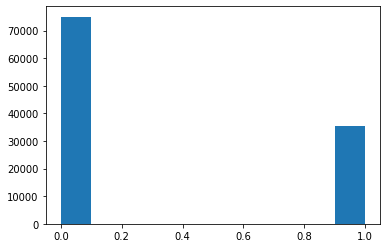

In [302]:
# exploring the variable with histogram
plt.hist(df['sms_received'])
plt.show()

In [208]:
# Using masks to seperate to : 

received = df.query('sms_received == 1')
not_received = df.query('sms_received == 0')


(0.7242545516036301, 0.8329668865347458)

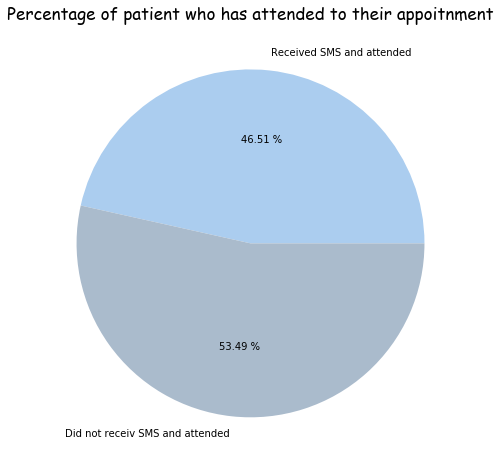

In [220]:
#Getting the mean of the masks
received_mean = received['is_present'].mean()
not_received_mean = not_received['is_present'].mean()

plt.figure(figsize=(9,8))

labels = ['Received SMS and attended', 'Did not receiv SMS and attended']
colors = ['#abcdef', '#aabbcc']

plt.pie([received_mean, not_received_mean], labels = labels, colors=colors, autopct='%.2f %%')
plt.title('Percentage of patient who has attended to their appoitnment', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 17})
plt.show()

## Based of the histogram most of the patient didn't receive an sms message.

### Q2 - Who is more likley to be displince to their appointment (men/women) ?

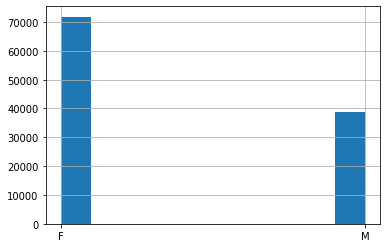

In [303]:
# exploring the variable with histogram

df['gender'].hist()

## Based on the graph most of the patient are Females

In [232]:
gender= df.groupby('gender')['is_present'].mean()
gender

gender
F    0.796854
M    0.800321
Name: is_present, dtype: float64

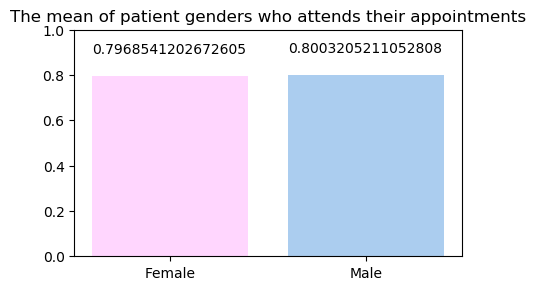

In [257]:
plt.figure(figsize=(5,3), dpi=100)

labels = ['Female', 'Male']
values = [gender[0],gender[1]]


bars = plt.bar(labels, values , color={'#abcdef','#ffd6fe'})

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .1, yval)

    
plt.ylim(top=1)
plt.title('The mean of patient genders who attends their appointments')

plt.show()

### Q3 - Is being handicapped limits the chances of attending your appointment ?

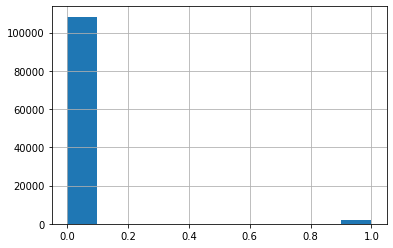

In [304]:
# exploring the variable with histogram

df['handcap'].hist()

In [253]:
handcap= df.groupby('handcap')['is_present'].mean()
handcap

handcap
0    0.797647
1    0.818385
Name: is_present, dtype: float64

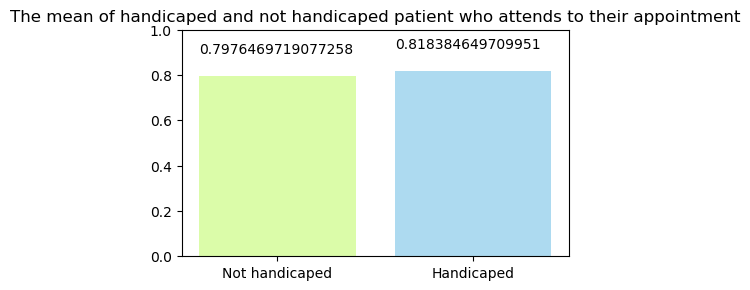

In [256]:
plt.figure(figsize=(5,3), dpi=100)

labels = ['Not handicaped', 'Handicaped']
values = [handcap[0],handcap[1]]


bars = plt.bar(labels, values , color={'#addaf0','#dbfca9'})

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .1, yval)

    
plt.ylim(top=1)

plt.title('The mean of handicaped and not handicaped patient who attends to their appointment')

plt.show()

## Q4 - does the gap of between the scheduled day and appointment day affects patient attendence ?

In [272]:
# Add new column to add appointment gap 
df['appointment_gap'] =  df['appointmentday'] - df['scheduledday'] 
# Get the mean 
df['appointment_gap'].mean()
# we dwfine two mask one for long appointment , close appointment
long_app = df.loc[df['appointment_gap'] >= '9 days']
close_app = df.loc[df['appointment_gap'] < '9 days']

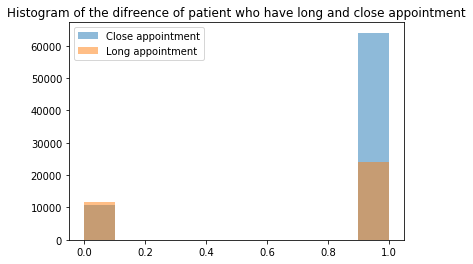

In [290]:
# check the hist 

plt.hist(close_app['is_present'],alpha=0.5,label='Close appointment')
plt.hist(long_app['is_present'],alpha=0.5,label='Long appointment')

plt.legend()
plt.title('Histogram of the difreence of patient who have long and close appointment')
plt.show()


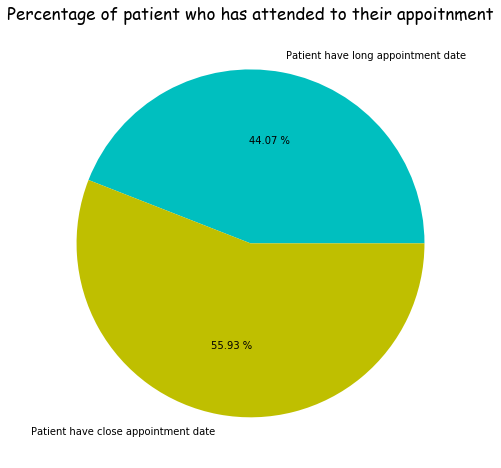

In [299]:
#Getting the mean of the masks
long_app_mean = long_app['is_present'].mean()
close_app_mean = close_app['is_present'].mean()

plt.figure(figsize=(9,8))

labels = ['Patient have long appointment date', 'Patient have close appointment date']
colors = ['c', 'y']

plt.pie([long_app_mean, close_app_mean], labels = labels, colors=colors, autopct='%.2f %%')
plt.title('Percentage of patient who has attended to their appoitnment', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 17})
plt.show()

<a id='conclusions'></a>
## Conclusions


# Q1 -  Does the patient who receives sms message is usually attending the appointments ?

### The answer we have got from this question it was not expected as you may think that if the patient did receive a sms message that will guarntee he is going to attend his appointment 
### The result was people who did't receive the sms are more likley to come to their appointment

# Q2 - Who is more likley to be displince to their appointment (men/women) ?

### the answer it was very close to each other the diffrence of the mean was onlu 0.01, but mostly women are more likley to attend 

# Q3 - Is being handicapped limits the chances of attending your appointment ?

### Handipaed patient are more likley to attend their appointments than not handicaped patient 

# Q4 - does the gap of between the scheduled day and appointment day affects patient attendence ?

### The mean which patient are booking there appointments is after 9 days of schedule day ,so we have seperated out data into two datasets, and the conclusion is patient who bookes his appointemnt less than the mean(9 days) is more likley to attend his appointment.